In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Different Data Collection Strategies

- Interviews
- Questionnaires and surveys
- Observations
- Documents and records
- Focus groups
- Oral histories

for more information on the above methods:

refer this link: https://www.jotform.com/data-collection-methods/#:~:text=data%20collection%20tools-,Interviews,-If%20you%20asked

### Why do we have missing values?

- People Hesistate to put down the information
- Surveys are not taken seriously by the participants, and they enter some random values and leave out some values. (Thus, Surveys are not completely reliable)
- Sometimes, a proper value won't be available to enter for a particular category.
- We might miss some historical records

## Different Types of Missing Values

### Missing Completely at Random (MCAR)

- If the probablity of missing is same for all the observations.
- When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.
- In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [2]:
df = sns.load_dataset('titanic')

df.isnull().sum()[df.isnull().sum()>0]

# Since, embarked and embarked town are same columns, let's only consider embarked column

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [3]:
# To understand if there is any relationship between the missing data and other data, we have to learn about the feature descriptions first.
# To make it simple...

print(f"People with missing age: \n{df[df['age'].isnull()]['survived'].value_counts()}")
print('\n')
print(f"People with missing deck: \n{df[df['deck'].isnull()]['survived'].value_counts()}")
print('\n')
print(f"People with missing embarked: \n{df[df['embarked'].isnull()]['survived'].value_counts()}")
print('\n\n')
print(f"People with missing age and deck: \n{df[(df['age'].isnull()) & (df['deck'].isnull())]['survived'].value_counts()}")
print('\n')
print(f"People with missing age and embarked: \n{df[(df['age'].isnull()) & (df['embarked'].isnull())]['survived'].value_counts()}")
print('\n')
print(f"People with missing deck and embarked: \n{df[(df['deck'].isnull()) & (df['embarked'].isnull())]['survived'].value_counts()}")

# Most of the people with missing ages are dead.
# Most of missing people with missing deck are dead.
# Most of people with missing ages and deck are dead.
# So, there is some relationship between survival and the missing values.
# Thus, the missing values in age and deck are not MCAR.


# On the other hand...
# there is no relationship between embarked and other missing columns.
# And, the missing values in embarked are also not because the people are dead, as they both of them are alive.
# So, we can consider that embarked values are MCAR

People with missing age: 
0    125
1     52
Name: survived, dtype: int64


People with missing deck: 
0    482
1    206
Name: survived, dtype: int64


People with missing embarked: 
1    2
Name: survived, dtype: int64



People with missing age and deck: 
0    117
1     41
Name: survived, dtype: int64


People with missing age and embarked: 
Series([], Name: survived, dtype: int64)


People with missing deck and embarked: 
Series([], Name: survived, dtype: int64)


#### Observation

**We can consider that embarked values are MCAR**

### Missing Not At Random (MNAR)

Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [4]:
# Previously, we have seen that there is some relationship survival, age, and deck.

# So, Missing values in 'age' and 'deck' are MNAR

### Missing At Random (MAR)

In [5]:
# It's not completely random, but it has some reason for randomness.
# For example, if we have a dataset which has data of equal no. of men and women, which lists down the information of salary and age.
# According to many people, men tend to hide their salary, and women tend to hide their salary.
# So, we might find the more missing values in salary for men and in age for women.

# The missing data is random but it has some dependency in the gender column.

# Different ways of Handling Missing Values

## 1. Mean/ Median/ Mode Replacement (For MCAR)

**When should we apply this?**
- For MCAR values


Although the mode, or most frequent value can be calculated for both numerical and categorical variables, in practice, we only use this technique on categorical variables. The reason is that for numerical variables, the mean or the median tend to better represent the average value of the population.

### Mean/Median Replacement

- For continous variables

**How should we apply this?**
- By replacing the Nan values with mean or median

In [6]:
# In the dataframe df, the missing values in age column are not MCAR.
# but, let's work on it for the sake of implementation and understanding
# Let's use median for this one. As age values are in rounded values, median will also be a rounded value.


med_age = df['age'].median()

df['age_median'] = df['age'].fillna(med_age)

In [7]:
print(df['age'].std())
print(df['age_median'].std())

14.526497332334044
13.019696550973194


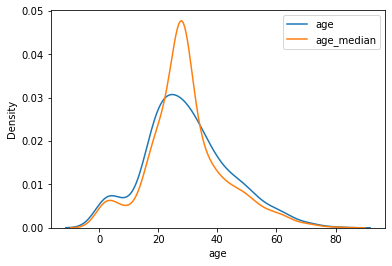

In [8]:
sns.kdeplot(df['age'], label = 'age')
sns.kdeplot(df['age_median'], label = 'age_median')

plt.legend();

#### Advantages:
- Easy to implement(Robust to outliers)
- Faster way to obtain the complete dataset
- It can be integrated in production (during model deployment).

#### Disadvantages:
- Change or Distortion in the original variance
- Impacts Correlation

### Mode Replacement ( or Frequent Categories Imputation)

- For categorical variables

**When should we apply this?**
- For MCAR values
- No more than 5% of the variable contains missing data.
- When the percentage of missing values is so high (~50%) we are better off creating a new category (Missing) to enclose the observations with NA.
- (My thought) If the no. of missing values are not less than 5% and not as high as 50%, replace it with the mode value and create a new column to capture the missing values.

**How should we apply this?**
- By replacing the Nan values with mode/most frequen occuring value in the column.

In the dataframe df, embarked column has MCAR missing values, and it is a categorical column. So, let's use Mode replacement for it.

In [9]:
# Replacing the missing values in embarked with mode value of embarked.

most_occuring_emb = df["embarked"].mode()[0]

df['embarked'] = df['embarked'].fillna(most_occuring_emb)

# Similar process for continous features with mean/ median values of the same column.

In [10]:
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [11]:
df['embarked'].isnull().sum()

0

#### Advantages:
- It is easy to implement.
- It is the fast way of obtaining complete datasets.
- It can be integrated in production (during model deployment).

#### Disadvantages:
- It distorts the relation of the most frequent label with other variables within the dataset.
- It May lead to an over-representation of the most frequent label if there is a big number of NA.

## 2. Random Sample Imputation (For MCAR)

Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

**When should we apply this?**
- For MCAR values

In [12]:
df = sns.load_dataset('titanic')

In [13]:
# first find the no. of missing values
# considering embarked because the missing values in this column are MCAR

no_of_missing = df['embarked'].isnull().sum()

no_of_missing

2

In [14]:
# Pick two random values from the same column other than Nan values

rand_emb_values = df['embarked'].dropna().sample(no_of_missing, random_state = 42).copy()

rand_emb_values

281    S
435    S
Name: embarked, dtype: object

In [15]:
# Replacement only happens when the index positions are same
# matching the index values

rand_emb_values.index = df[df['embarked'].isnull()].index

In [16]:
df.loc[df['embarked'].isnull(), 'embarked'] = rand_emb_values

In [17]:
df['embarked'].isnull().sum()

0

In [18]:
# Let's perform this process for age column to check statistical information.

def rand_impute(df, variable):
    """
    This function will impute random values for continuous variables.
    This will create a new variable.
    """
    df[variable+'_random'] = df[variable].copy()
    no_missing = df[variable].isnull().sum()
    rand_values = df[variable].dropna().sample(no_missing, random_state = 42)
    rand_values.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = rand_values

In [19]:
# Replacing all the missing values in age with random values in age column.

rand_impute(df, 'age')

In [20]:
df['age_random'].isnull().sum()

0

In [21]:
print(df['age'].median())
print(df['age_random'].median())

# No change in the median.

28.0
28.0


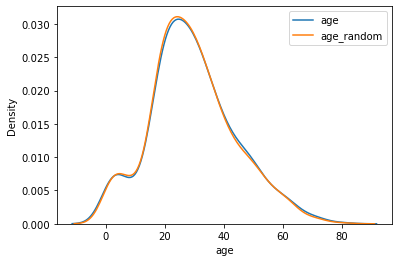

In [22]:
sns.kdeplot(df['age'], label = 'age')
sns.kdeplot(df['age_random'], label = 'age_random')

plt.legend();

# Not much change in the distribution of the series.

#### Advantages:
- Easy to implement(Robust to outliers)
- There is less distortion in variance

#### Disadvantages:
- It won't work perfectly every time, as it depends on the dataset and random state.


If the output data is not having similar distribution, try to alter the random state and find a better working value.

If more than 50% of the data is missing, it won't work.

## 3. Capturing Nan values with a new feature (For MNAR)

- It helps to the model to understand there is something happened here and it captures the importance of NaN.
- This method is create additional features therfore it work better with less number of feature

**When should we apply this?**
- For MNAR values

**How should we apply this?**
- Create a new column representing the missing values in our existing column.
- Fill the Nan values in the existing column using some suitable method.

In [23]:
df = sns.load_dataset('titanic')

In [24]:
# Apply for age column
# Wherever age is null, age_null feature will have 1 and 0 for non-null values.

df['age_nan'] = np.where(df['age'].isnull(), 1, 0)

In [25]:
df[['age', 'age_nan', 'survived']]

,age,age_nan,survived
0,22.0,0,0
1,38.0,0,1
2,26.0,0,1
3,35.0,0,1
4,35.0,0,0
...,...,...,...
886,27.0,0,0
887,19.0,0,1
888,NaN,1,0
889,26.0,0,1


In [26]:
# Replacing the Nan values in age column with median value

df['age'] = df['age'].fillna(df['age'].median())

In [27]:
df['age'].isnull().sum()

0

#### Advantages:
- Easy to implement(Robust to outliers)
- Captures the importance of missing values

#### Disadvantages:
- Creating Additional Features(Curse of Dimensionality)

## 4. End of Distribution Imputation (For MNAR)

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

**When should we apply this?**
- For MNAR values

**How should we apply this?**
- Replace missing data with values that are at the tails of the distribution of the variable.

Example:
- If for some dataset garage area is missing and it is related to existance of garage, we will place 0 in the missing values. It is the left side extreme value and it completely makes sense to us.
- Similarly, If age is missing for some people, while it is not at random, and it is dependent on survival column (Not specifically discussing about titanic dataset, generally speaking). It might be because those people are dead, so we will replace the missing age with the right side extreme value(not necessarily the maximum value) of the age dataset, we will see how do we do it soon.

In [28]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


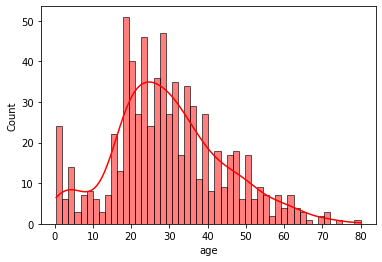

In [29]:
sns.histplot(df['age'],bins = 50, kde = True, color = 'red');

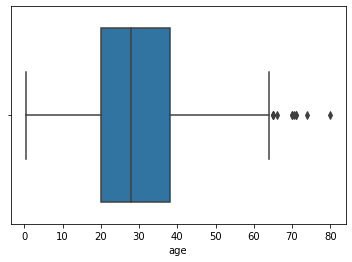

In [30]:
sns.boxplot(x = 'age', data = df);

**Since, we know “age” follows a normal distribution, outliers will be computed using the mean rather than the median.**

In [31]:
# Thus, extreme value should be considered using Normal distrubtion.

extreme = df['age'].mean() + 3*df['age'].std()

In [32]:
# Imputing this extreme value and creating a new column for the age

df['age_end_dist'] = df['age'].copy()

df['age_end_dist'] = df['age_end_dist'].fillna(extreme)

In [33]:
# Let's impute median value for the age column and create another column for comparison.

df['age_median'] = df['age'].fillna(df['age'].median())

<AxesSubplot:>

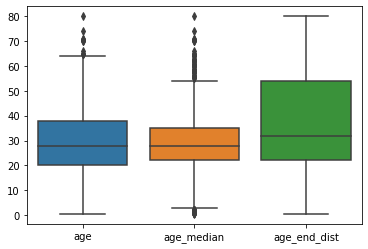

In [34]:
sns.boxplot(data = df[['age', 'age_median', 'age_end_dist']])

# our age_end_dist has no outliers 
# But, this is using median and quartiles for distribution

<AxesSubplot:ylabel='Density'>

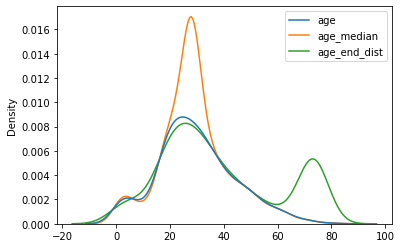

In [35]:
# Let's check the distribution of these columns

sns.kdeplot(data = df[['age', 'age_median', 'age_end_dist']])

#### Advantages:
- Quick and captures the importance of missing values (if one suspects the missing data is valuable)
- Captures the importance of missing values

#### Disadvantages:
- May distort the variable, mask predictive power if missingness is not important, hide true outliers if the missing data is large or create an unintended outlier if NaN values are small.

### 5. Arbitrary Imputation (For MNAR)

- Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value.
- Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).
- Suitable for both numerical and categorical variables
- For categorical variables
    - This is the equivalent of replacing all instances of NA by an additional label called ‘Missing’, which is a very common practice.


**When should we apply this?**
- For MNAR values

**How should we apply this?**
- Ideally, we want to look for a value that is at the end of the distribution.

Similar to End of distribution imputation, but here we choose a reasonable end value without any mathematical calculations.

In [36]:
df = sns.load_dataset('titanic')
df = df[['age', 'fare', 'survived']]
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [37]:
# Let's impute 0 and 100 for age as they are typically used and are in range of upper limits of age.

df['age_zero'] = df['age'].fillna(0)

df['age_hundred'] = df['age'].fillna(100)

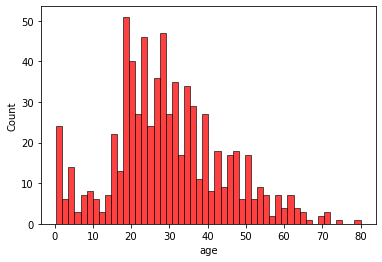

In [38]:
sns.histplot(x = df['age'], bins = 50, color = 'red');

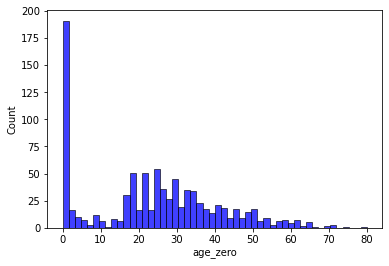

In [39]:
sns.histplot(x = df['age_zero'], bins = 50, color = 'blue');

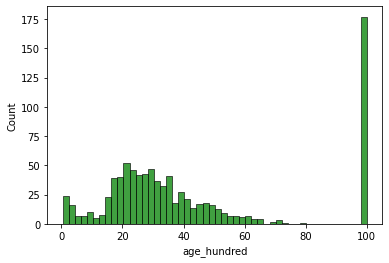

In [40]:
sns.histplot(x = df['age_hundred'], bins = 50, color = 'green');

In [41]:
# Choosing a color palette for kde plot

sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

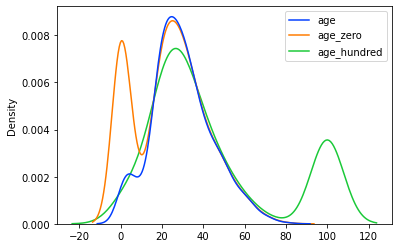

In [42]:
sns.kdeplot(data = df[['age', 'age_zero', 'age_hundred']],palette='bright');

#### Advantages:
- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated into production (during model deployment)
- Captures the importance of “missingness” if there is one

#### Disadvantages:
- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset
- If the arbitrary value is at the end of the distribution it may mask or create outliers


**Note:** Need to be careful not to choose an arbitrary value too similar to the mean or median (or any other common value of the variable distribution)


### 6. Frequent Categories Imputation

In [43]:
# Discussed this concept in Mode Replacement

### Note: All the above methods should be performed on the training set and propagated on the test set.